In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [2]:
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv",index_col='Id')

# **Exploring Data**

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# **Dealing with Null Values and datatype**

In [8]:
def pre_process(df):
    n_df=df.select_dtypes(include='number')
    n_cols=n_df.columns
    for col in n_cols:
        df[col]=df[col].fillna(df[col].median())
    s_df=df.select_dtypes(include='object')
    s_cols=s_df.columns
    for col in s_cols:
        df[col]=df[col].fillna(df[col].value_counts().idxmax())
    for col in s_cols:
        df[col]=pd.factorize(df[col])[0]  
    return df     

ptr_df=pre_process(df)
ptr_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000


# **Heatmap to see correlation**

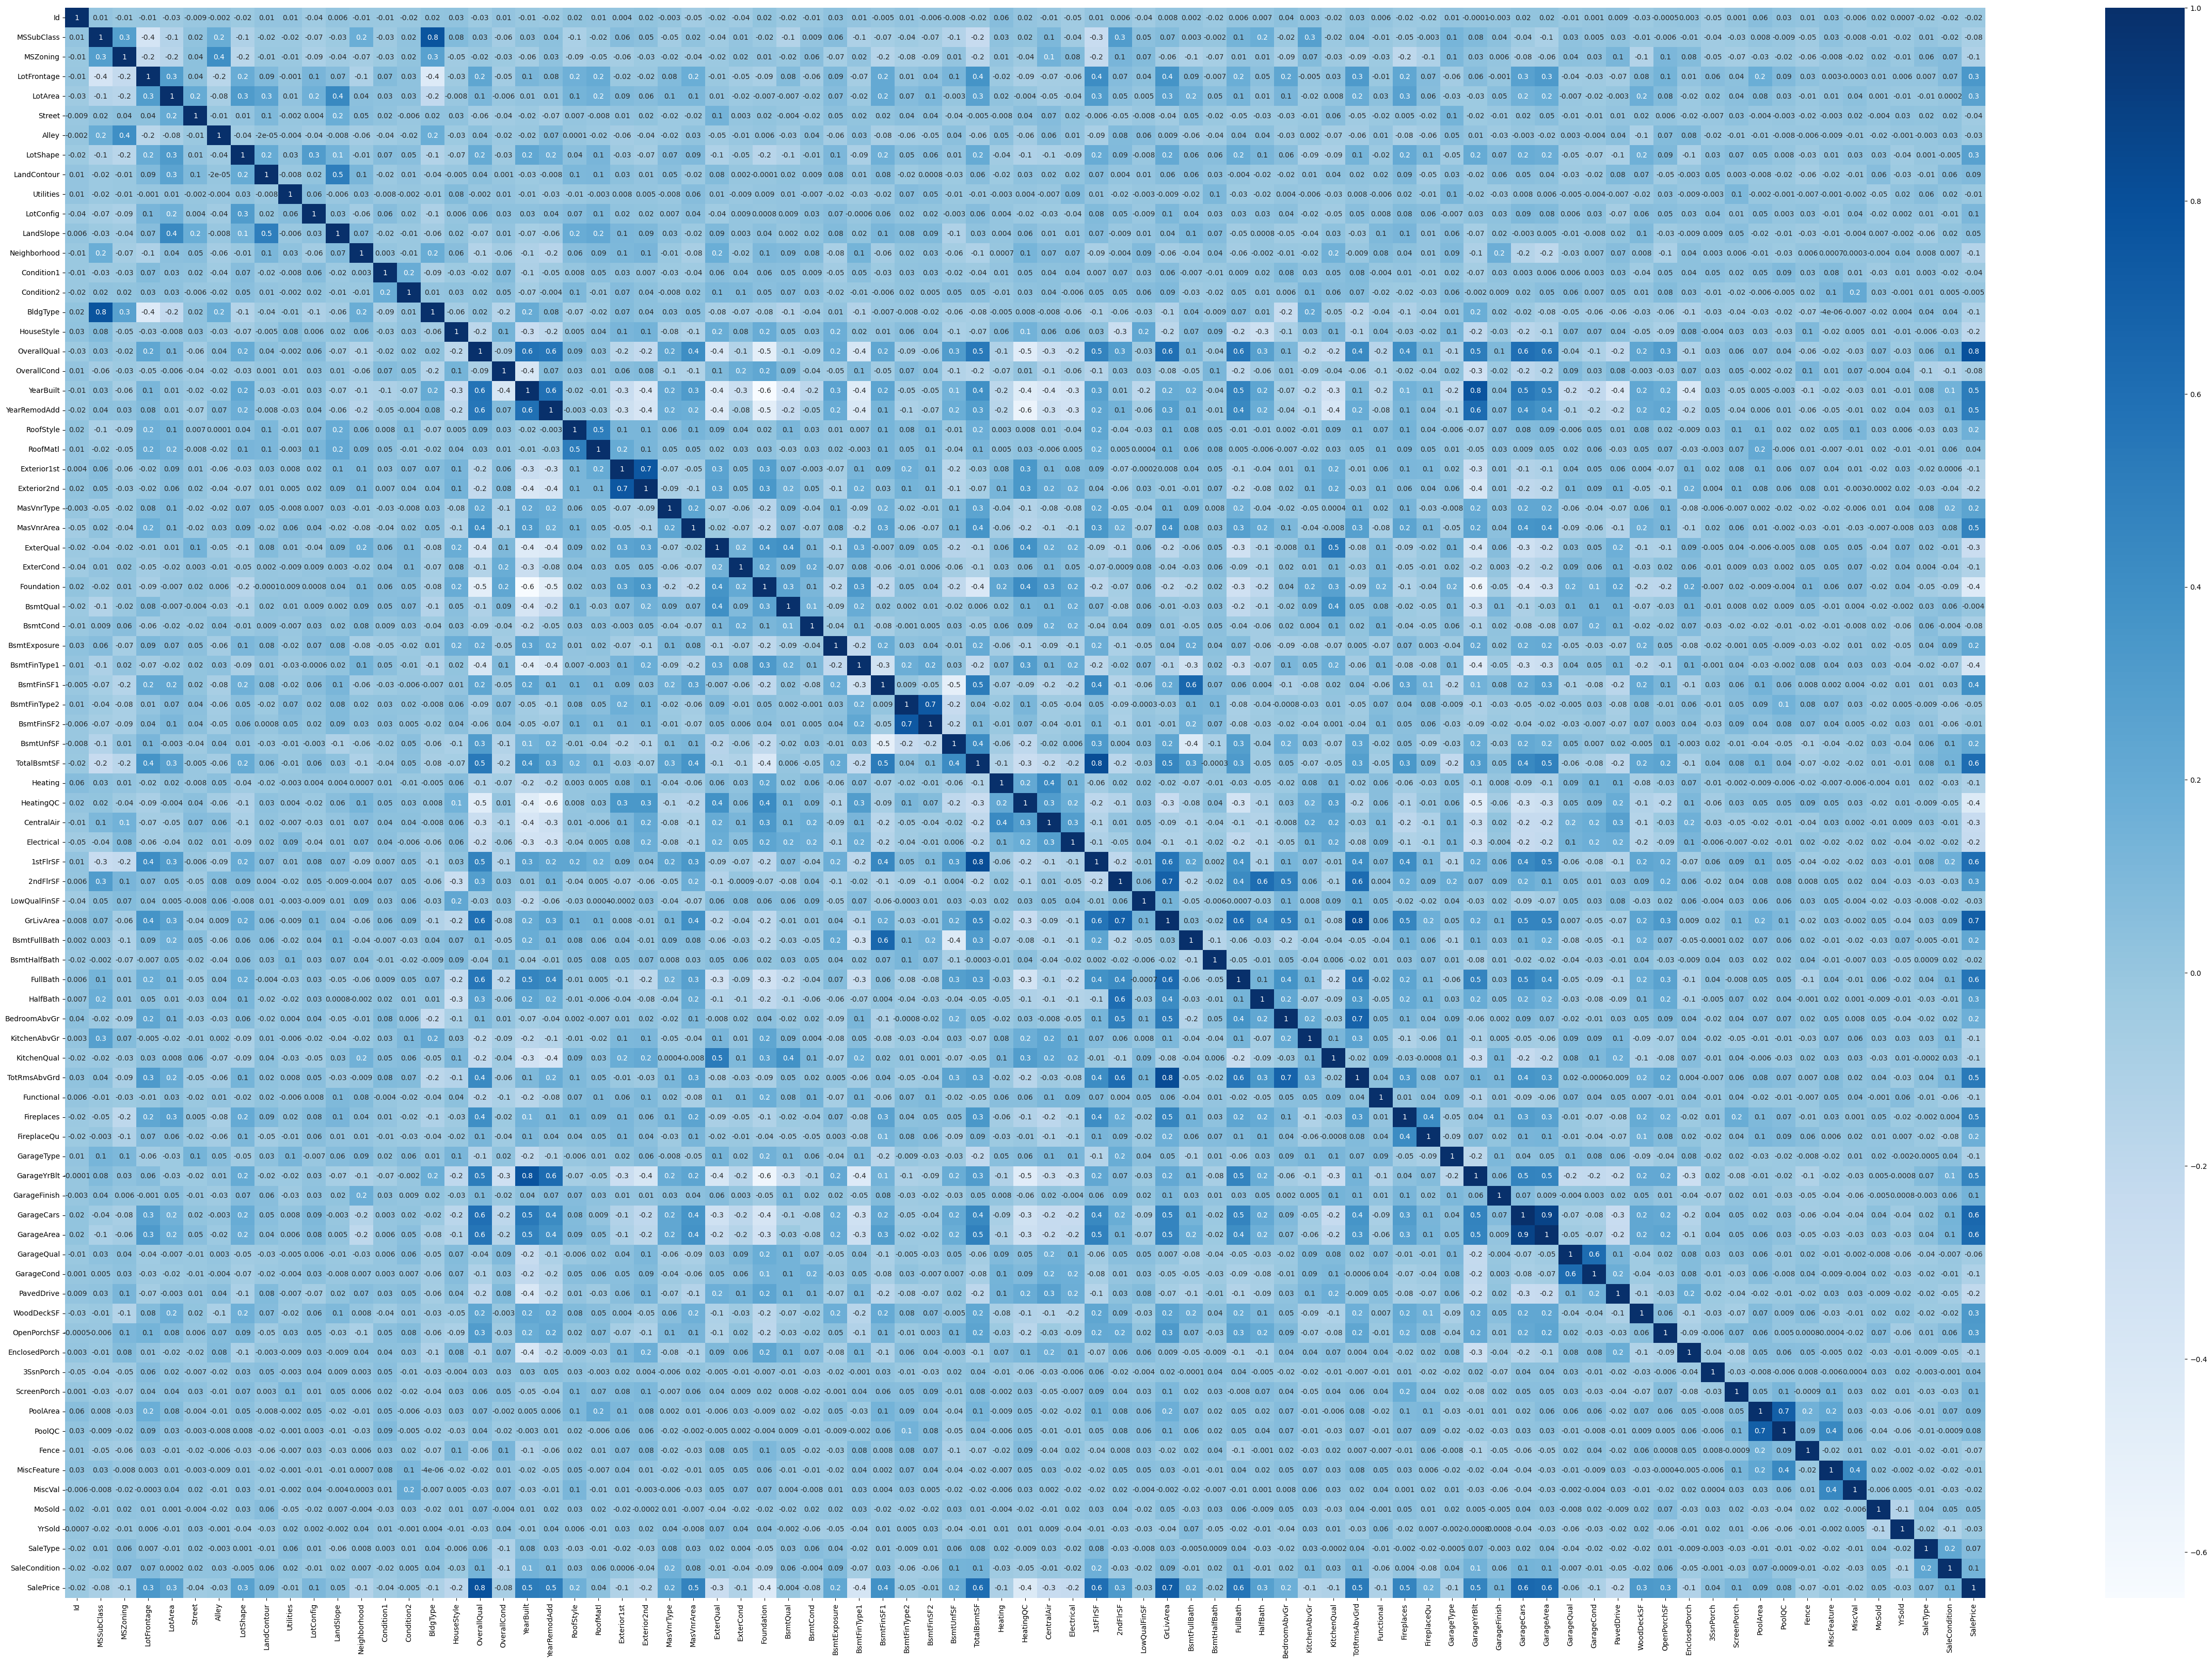

In [9]:
cor=ptr_df.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

# **Correlation Matrix**

In [10]:
print(cor)

                     Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.011949    -0.009921 -0.033226   
MSSubClass     0.011156    1.000000  0.286937    -0.356718 -0.139781   
MSZoning      -0.011949    0.286937  1.000000    -0.228998 -0.161640   
LotFrontage   -0.009921   -0.356718 -0.228998     1.000000  0.304522   
LotArea       -0.033226   -0.139781 -0.161640     0.304522  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.021172   -0.013585  0.022231     0.010451  0.001205   
YrSold         0.000712   -0.021407 -0.010621     0.006380 -0.014261   
SaleType      -0.016932    0.012874  0.058948     0.007377 -0.013882   
SaleCondition -0.017712   -0.015047  0.068705     0.070884  0.000199   
SalePrice     -0.021917   -0.084284 -0.116047     0.334771  0.263843   

                 Street     Alley  LotShape  LandContour  Utilities  ...  \
Id            -0.008916 -0.001658 -0.024071     0.014769   

# **Selecting Highly correlated variable**

In [11]:
# Find highly correlated features
highly_correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.7:  
            colname_i = cor.columns[i]
            colname_j = cor.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Convert the set of highly correlated features to a list
highly_correlated_features_list = list(highly_correlated_features)

# Print or inspect the highly correlated features
print(highly_correlated_features_list)


['BsmtFinType2', 'GarageArea', 'OverallQual', 'YearBuilt', 'Exterior1st', 'GarageCars', 'TotalBsmtSF', 'BldgType', 'SalePrice', 'Exterior2nd', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'MSSubClass', 'GrLivArea', 'BsmtFinSF2']


In [12]:
sel_df=ptr_df[['YrSold','SalePrice', 'GrLivArea', 'BsmtFinSF2', 'Fireplaces', 'YearBuilt', '1stFlrSF', 'PoolArea', 'TotalBsmtSF', 'GarageQual', 'BldgType', 'Exterior2nd', 'BsmtFinType2', 'GarageArea', 'TotRmsAbvGrd', 'MSSubClass', 'FireplaceQu', 'GarageCond', 'GarageYrBlt', 'OverallQual', 'PoolQC', 'GarageCars', 'Exterior1st']]

sel_df.shape

(1460, 23)

In [13]:
sel_df.head()

,YrSold,SalePrice,GrLivArea,BsmtFinSF2,Fireplaces,YearBuilt,1stFlrSF,PoolArea,TotalBsmtSF,GarageQual,...,GarageArea,TotRmsAbvGrd,MSSubClass,FireplaceQu,GarageCond,GarageYrBlt,OverallQual,PoolQC,GarageCars,Exterior1st
0,2008,208500,1710,0,0,2003,856,0,856,0,...,548,8,60,0,0,2003.0,7,0,2,0
1,2007,181500,1262,0,1,1976,1262,0,1262,0,...,460,6,20,1,0,1976.0,6,0,2,1
2,2008,223500,1786,0,1,2001,920,0,920,0,...,608,6,60,1,0,2001.0,7,0,2,0
3,2006,140000,1717,0,1,1915,961,0,756,0,...,642,7,70,0,0,1998.0,7,0,3,2
4,2008,250000,2198,0,1,2000,1145,0,1145,0,...,836,9,60,1,0,2000.0,8,0,3,0


In [14]:
X=sel_df.drop('SalePrice',axis=1)
X.head()


,YrSold,GrLivArea,BsmtFinSF2,Fireplaces,YearBuilt,1stFlrSF,PoolArea,TotalBsmtSF,GarageQual,BldgType,...,GarageArea,TotRmsAbvGrd,MSSubClass,FireplaceQu,GarageCond,GarageYrBlt,OverallQual,PoolQC,GarageCars,Exterior1st
0,2008,1710,0,0,2003,856,0,856,0,0,...,548,8,60,0,0,2003.0,7,0,2,0
1,2007,1262,0,1,1976,1262,0,1262,0,0,...,460,6,20,1,0,1976.0,6,0,2,1
2,2008,1786,0,1,2001,920,0,920,0,0,...,608,6,60,1,0,2001.0,7,0,2,0
3,2006,1717,0,1,1915,961,0,756,0,0,...,642,7,70,0,0,1998.0,7,0,3,2
4,2008,2198,0,1,2000,1145,0,1145,0,0,...,836,9,60,1,0,2000.0,8,0,3,0


In [15]:
X.columns

Index(['YrSold', 'GrLivArea', 'BsmtFinSF2', 'Fireplaces', 'YearBuilt',
       '1stFlrSF', 'PoolArea', 'TotalBsmtSF', 'GarageQual', 'BldgType',
       'Exterior2nd', 'BsmtFinType2', 'GarageArea', 'TotRmsAbvGrd',
       'MSSubClass', 'FireplaceQu', 'GarageCond', 'GarageYrBlt', 'OverallQual',
       'PoolQC', 'GarageCars', 'Exterior1st'],
      dtype='object')

In [16]:
X.shape

(1460, 22)

In [17]:
y=sel_df['SalePrice']

In [18]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [19]:
y.shape

(1460,)

In [20]:
import statsmodels.api as sm
x=sm.add_constant(X)
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              1803.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                        0.00
Time:                        05:44:01   Log-Likelihood:                         -17427.
No. Observations:                1460   AIC:                                  3.490e+04
Df Residuals:                    1438   BIC:                                  3.501e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
YrSold        -496.3494     57.445     -8.640      0.000    -609.035    -383.664
GrLivArea       48.6946      4.336     11.230      0.000      40.189      57.200
BsmtFinSF2       5.1756      9.177      0.564      0.573     -12.826      23.177
Fireplaces    8915.5384   1989.600      4.481      0.000    5012.709    1.28e+04
YearBuilt      337.8722     61.019      5.537      0.000     218.177     457.568
1stFlrSF        10.0017      5.243      1.908      0.057      -0.283      20.287
PoolArea       -99.3912     35.265     -2.818      0.005    -168.569     -30.214
TotalBsmtSF     18.5521      4.262      4.353      0.000      10.191      26.913
GarageQual    4663.0451   3684.931      1.265      0.206   -2565.371    1.19e+04
BldgType     -5249.0364   1767.852     -2.969      0.003   -8716.881   -1781.192
Exterior2nd    953.5961    588.985      1.619      0.106    -201.765    2108.957
BsmtFinType2  -940.2198   1462.265     -0.643      0.520   -3808.621    1928.182
GarageArea      11.2629     10.426      1.080      0.280      -9.189      31.714
TotRmsAbvGrd -1122.7960   1119.416     -1.003      0.316   -3318.660    1073.068
MSSubClass     -44.8394     45.669     -0.982      0.326    -134.425      44.746
FireplaceQu    -99.3585   1496.239     -0.066      0.947   -3034.404    2835.687
GarageCond   -2141.5187   3774.559     -0.567      0.571   -9545.750    5262.713
GarageYrBlt    136.8842     69.129      1.980      0.048       1.280     272.488
OverallQual   1.963e+04   1171.566     16.756      0.000    1.73e+04    2.19e+04
PoolQC        4.933e+04   1.68e+04      2.932      0.003    1.63e+04    8.23e+04
GarageCars    9560.0801   3028.780      3.156      0.002    3618.779    1.55e+04
Exterior1st   -933.9127    604.647     -1.545      0.123   -2119.998     252.173
==============================================================================
Omnibus:                      409.363   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35750.865
Skew:                           0.177   Prob(JB):                         0.00
Kurtosis:                      27.240   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Dealing with test data**

In [21]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
df_test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [23]:
df_test.shape

(1459, 79)

In [24]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [25]:
df_test_sel=df_test[['BsmtFinType2', 'BldgType', 'BsmtFinSF2', 'PoolQC', 'YearBuilt', 'FireplaceQu', 'GarageArea', '1stFlrSF', 'OverallQual', 'Exterior1st', 'GrLivArea', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'TotalBsmtSF', 'PoolArea', 'TotRmsAbvGrd',  'Exterior2nd', 'GarageCond', 'GarageQual', 'MSSubClass','YrSold']]

In [26]:
df_test_sel.isnull().sum()

BsmtFinType2      42
BldgType           0
BsmtFinSF2         1
PoolQC          1456
YearBuilt          0
FireplaceQu      730
GarageArea         1
1stFlrSF           0
OverallQual        0
Exterior1st        1
GrLivArea          0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
TotalBsmtSF        1
PoolArea           0
TotRmsAbvGrd       0
Exterior2nd        1
GarageCond        78
GarageQual        78
MSSubClass         0
YrSold             0
dtype: int64

In [27]:
def pre_process_test(df_test_sel):
    n_df_t=df_test_sel.select_dtypes(include='number')
    n_cols_t=n_df_t.columns
    for col in n_cols_t:
        df_test_sel.loc[:, col] = df_test_sel[col].fillna(df_test_sel[col].median())
    s_df_t=df_test_sel.select_dtypes(include='object')
    s_cols_t=s_df_t.columns
    for col in s_cols_t:
        df_test_sel.loc[:, col] = df_test_sel[col].fillna(df_test_sel[col].value_counts().idxmax())
    for col in s_cols_t:
        df_test_sel.loc[:,col]=pd.factorize(df_test_sel[col])[0]  
    return df_test_sel     

ptr_df_t=pre_process_test(df_test_sel)
ptr_df_t.isnull().sum()

BsmtFinType2    0
BldgType        0
BsmtFinSF2      0
PoolQC          0
YearBuilt       0
FireplaceQu     0
GarageArea      0
1stFlrSF        0
OverallQual     0
Exterior1st     0
GrLivArea       0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
TotalBsmtSF     0
PoolArea        0
TotRmsAbvGrd    0
Exterior2nd     0
GarageCond      0
GarageQual      0
MSSubClass      0
YrSold          0
dtype: int64

In [28]:
ptr_df_t.columns

Index(['BsmtFinType2', 'BldgType', 'BsmtFinSF2', 'PoolQC', 'YearBuilt',
       'FireplaceQu', 'GarageArea', '1stFlrSF', 'OverallQual', 'Exterior1st',
       'GrLivArea', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'TotalBsmtSF',
       'PoolArea', 'TotRmsAbvGrd', 'Exterior2nd', 'GarageCond', 'GarageQual',
       'MSSubClass', 'YrSold'],
      dtype='object')

In [29]:
X_test=ptr_df_t[['YrSold', 'GrLivArea', 'BsmtFinSF2', 'Fireplaces', 'YearBuilt',
       '1stFlrSF', 'PoolArea', 'TotalBsmtSF', 'GarageQual', 'BldgType',
       'Exterior2nd', 'BsmtFinType2', 'GarageArea', 'TotRmsAbvGrd',
       'MSSubClass', 'FireplaceQu', 'GarageCond', 'GarageYrBlt', 'OverallQual',
       'PoolQC', 'GarageCars', 'Exterior1st']]


In [30]:
X_test.shape

(1459, 22)

In [31]:
X_train=X
y_train=y


# **Applying ML Algorithm**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()  
model.fit(X_train, y_train)



LinearRegression()

# **Export CSV**

In [33]:
test_pred=model.predict(X_test)
end_pred=pd.DataFrame(test_pred,index=df_test.index)
end_pred.columns=['SalePrice']
end_pred.to_csv('submission.csv',sep=',')
end_pred.head()

,SalePrice
Id,
1461,113669.856792
1462,158213.977509
1463,179006.206562
1464,196694.138278
1465,213148.174429


In [34]:
end_pred.shape

(1459, 1)

In [35]:
end_pred.tail()

,SalePrice
Id,
2915,63868.028472
2916,79593.101671
2917,151047.738845
2918,113610.273088
2919,243803.470036
